## KMean Clustering

### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

### Reading the data

In [3]:
df = pd.read_csv('wine.csv') # load the dataset using pandas

In [4]:
df.head(5) # inspect the top five row of the data set

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape # checks the numbe rof rows and column

(178, 13)

In [6]:
df.info() # check the dtat type of each column and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Cleaning The data

In [7]:
df.isnull().sum()  # check the number of missing values

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
df.duplicated().sum() # checks for duplicated values

0

In [9]:
df.describe() # brief describtion of numerical features

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Pre Processing

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
# function to scale all features
def scale(column):
    scaler.fit(df[[column]])
    df[column] = scaler.transform(df[[column]])

In [13]:
#scaling
for x in df.columns:
    scale(x)

In [14]:
df.head(3) #scaled dataframe

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933


In [15]:
from sklearn.cluster import KMeans
wss = [] # WSS means the sum of distances between the points and the corresponding centroids
k_rng = range(1,10) # from 1 to 9

# A For loop to initialise Kmean, fit the model, get and append the wss to the list for diffrent numbers of n_cluster
for i in k_rng:
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(df)
    wss.append(km.inertia_)

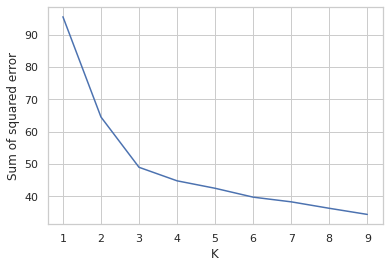

In [16]:
plt.plot(k_rng,wss)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

k = 3

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca =PCA()
x = pca.fit_transform(df)

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability and visualisation but at the same time minimizing information loss

###  KMean Model Fitting

In [19]:

kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x)
labels = np.unique(label)


### Visualisation of Predictions

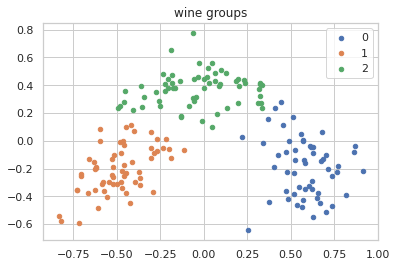

In [20]:
for i in labels:
    plt.scatter(x[label==i,0], x[label==i,1], label=i, s=20)
    
plt.legend()
plt.title('wine groups')
plt.show()

In [21]:
df['cluster']= label

<AxesSubplot:xlabel='cluster', ylabel='count'>

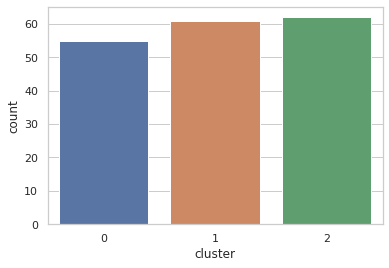

In [22]:
sns.countplot(data= df, x='cluster')